# 🎶 Clustering Music Genres 🎤

- In the diverse world of music, genres serve as the backbone of our listening experiences. From the pulsating beats of **Pop** to the soulful rhythms of **Jazz**, each genre encapsulates a unique blend of sounds and emotions that resonate with listeners. As we embark on this clustering analysis, our primary objective is to categorize these genres based on various musical features.

<div style="text-align: center;">
    <img src="https://harperradio.com/wp-content/uploads/2023/05/weirdest-awesomeest-best-music-genres.jpg" alt="Image">
</div>

# Data Dictionary

This data dictionary outlines the features included in the Spotify dataset, providing a description for each feature. The dataset can be accessed [here](https://www.kaggle.com/datasets/iamsumat/spotify-top-2000s-mega-dataset?resource=download).

| **Feature Name**                 | **Description**                                                                 |
|----------------------------------|---------------------------------------------------------------------------------|
| `Index`                          | Unique identifier for each entry in the dataset                                 |
| `Title`                          | Title of the song                                                                |
| `Artist`                         | Name of the artist or band performing the song                                   |
| `Top Genre`                      | Primary genre of the song                                                        |
| `Year`                           | Year the song was released                                                       |
| `Beats Per Minute (BPM)`        | Tempo of the song measured in beats per minute                                   |
| `Energy`                         | A measure of intensity and activity of the song (0 to 1 scale)                  |
| `Danceability`                   | Suitability of the track for dancing (0 to 1 scale)                             |
| `Loudness (dB)`                 | Average loudness of the track in decibels                                        |
| `Liveness`                       | Presence of an audience in the recording (0 to 1 scale)                         |
| `Valence`                        | Musical positiveness of the track (0 to 1 scale)                                 |
| `Length (Duration)`             | Duration of the song in milliseconds                                             |
| `Acousticness`                   | Measure of acoustic sound in the track (0 to 1 scale)                          |
| `Speechiness`                    | Presence of spoken words in the track (0 to 1 scale)                           |
| `Popularity`                     | Popularity score of the song (0 to 100 scale, where 100 is the most popular)   |

### Importing the necessary packages

In [1]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import datasets
from yellowbrick.cluster import KElbowVisualizer

### Importing the data

In [2]:
df=pd.read_csv('Spotify-2000.csv')

### EDA - Exploratoy Data Analysis 

In [3]:
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [4]:
df.shape

(1994, 15)

In [5]:
df.isnull().sum()

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

### Feature Engineering

In [7]:
df['Length (Duration)'] = df['Length (Duration)'].str.replace(',', '').astype(int)

In [8]:
df = df.drop('Index', axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   1994 non-null   object
 1   Artist                  1994 non-null   object
 2   Top Genre               1994 non-null   object
 3   Year                    1994 non-null   int64 
 4   Beats Per Minute (BPM)  1994 non-null   int64 
 5   Energy                  1994 non-null   int64 
 6   Danceability            1994 non-null   int64 
 7   Loudness (dB)           1994 non-null   int64 
 8   Liveness                1994 non-null   int64 
 9   Valence                 1994 non-null   int64 
 10  Length (Duration)       1994 non-null   int64 
 11  Acousticness            1994 non-null   int64 
 12  Speechiness             1994 non-null   int64 
 13  Popularity              1994 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 218.2+ KB


### Segmentation by using KMeans and calculating the Silhouette Score

In [10]:
x=pd.get_dummies(df,drop_first=True)

In [11]:
all_score=[]
all_clusters=[]
sum_of_squared_distances=[]
predicts=[]
def cluster(clusters):
    for i in np.arange(2,clusters):
        K=KMeans(n_clusters=i,random_state=42)
        K.fit(x)
        predict_kmeans=K.predict(x)
        score=silhouette_score(x,predict_kmeans)
        all_score.append(score)
        all_clusters.append(i)
        sum_of_squared_distances.append(K.inertia_)
        predicts.append(predict_kmeans)
        print(f"cluster={i}, score={score}")   

    df['cluster'] = K.predict(x)  #added results to df

In [12]:
cluster(10)

cluster=2, score=0.48921255959038473
cluster=3, score=0.28676318245674465
cluster=4, score=0.2162906718052309
cluster=5, score=0.21150980644947284
cluster=6, score=0.19707673978858756
cluster=7, score=0.19104846442418927
cluster=8, score=0.1726854493600824
cluster=9, score=0.16016837936881287


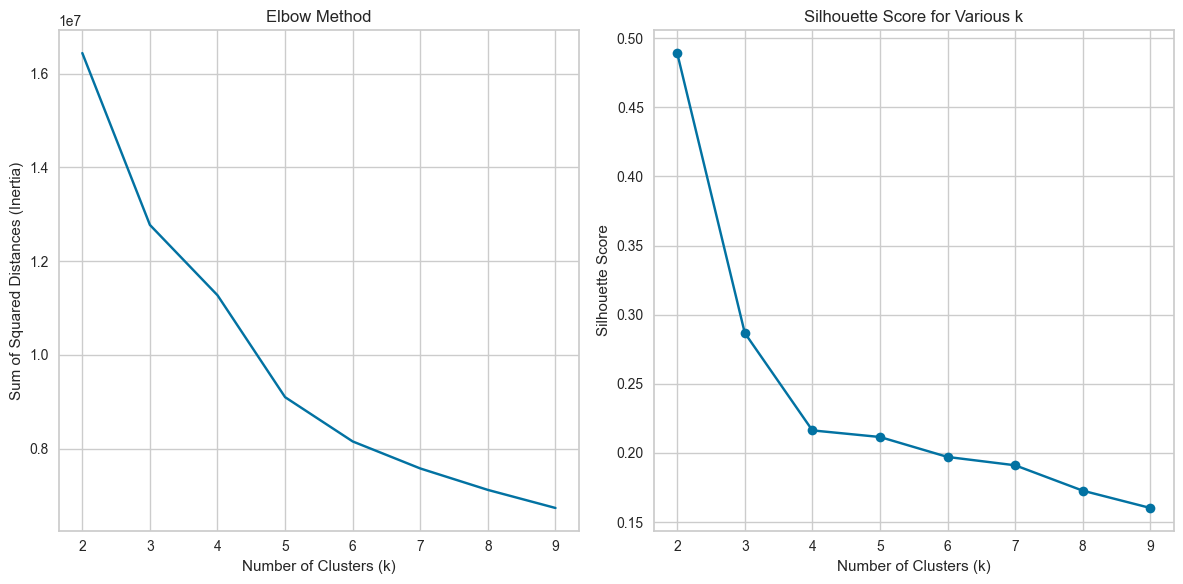

In [13]:
#elbow method plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.arange(2, 10), sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow Method')

#silhouette score plot
plt.subplot(1, 2, 2)
plt.plot(all_clusters, all_score, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Various k')

plt.tight_layout()
plt.show()

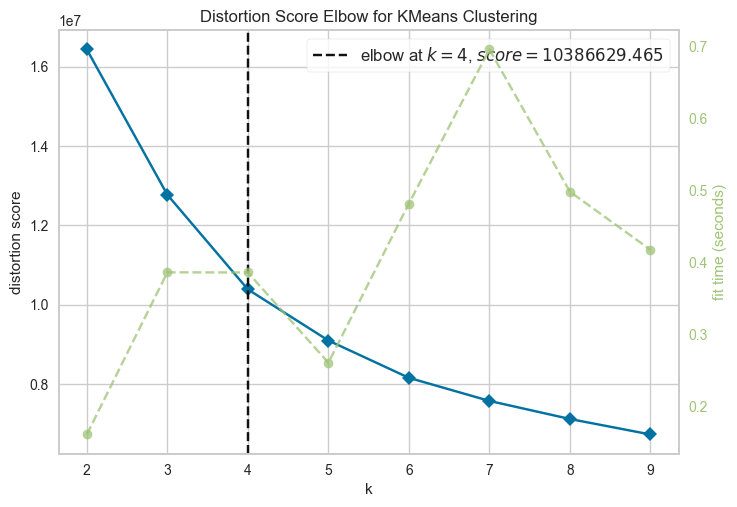

In [14]:
km=KMeans()
vis=KElbowVisualizer(km,k=(2,10))
vis.fit(x)
vis.show();

### Examining clusters based on the cluster column added to the DataFrame

In [15]:
df.sample(3)

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,cluster
656,Whatever You Want,Status Quo,album rock,2016,123,55,55,-11,18,42,242,85,4,36,4
1962,Just A Little Bit Of Peace In My Heart,Golden Earring,album rock,1969,95,72,27,-6,6,26,320,1,3,42,7
959,You Ain't Seen Nothing Yet,Bachman-Turner Overdrive,album rock,1974,118,44,48,-15,22,76,235,0,4,69,2


In [16]:
df[df['cluster'] == 3].head()

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,cluster
842,Echoes,Pink Floyd,album rock,1971,134,32,28,-17,11,14,1412,37,4,58,3
904,Close to the Edge (i. The Solid Time of Change...,Yes,album rock,1972,81,60,22,-11,41,25,1121,27,6,47,3
951,Autobahn - 2009 Remaster,Kraftwerk,dance rock,1974,82,50,33,-16,13,11,1367,11,4,48,3
1166,The Turn of a Friendly Card,The Alan Parsons Project,album rock,1980,151,32,38,-15,8,41,966,52,4,32,3
1982,Get Ready,Rare Earth,blues rock,1969,127,87,41,-6,83,65,1292,0,4,45,3


In [17]:
df[df['cluster'] == 8].head()

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,cluster
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39,8
12,Als Het Golft,De Dijk,dutch indie,2000,102,88,54,-6,53,59,214,2,3,34,8
14,Fluorescent Adolescent,Arctic Monkeys,garage rock,2007,112,81,65,-5,14,82,173,0,3,66,8
22,Als De Morgen Is Gekomen,Jan Smit,dutch pop,2006,96,89,63,-6,9,81,176,5,3,55,8
23,Somebody Told Me,The Killers,modern rock,2004,138,99,51,-3,12,65,197,0,9,69,8


## Results 📊

The clustering analysis yielded **4 distinct clusters** of music genres, with a silhouette score of approximately **0.216**. This score indicates a low to moderate separation between clusters, suggesting that while there are identifiable groupings, there may be some overlap among the genres.

The insights gained from this clustering model have several practical applications in the music industry:

- **Personalized Playlists**: Streaming platforms can utilize these clusters to create tailored playlists that cater to specific listener preferences, enhancing user engagement and satisfaction.

- **Targeted Marketing**: By understanding genre clusters, record labels can design marketing campaigns aimed at specific audience segments, promoting artists more effectively based on their musical styles.